In [11]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [8]:
df.pickup_datetime[0]

'2010-04-19 08:17:56 UTC'

In [10]:
df.fare_amount.describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

<AxesSubplot:>

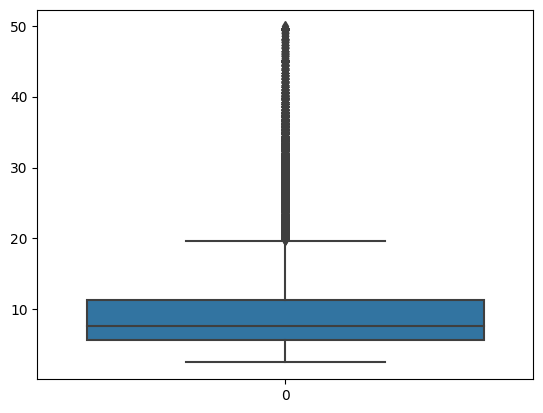

In [14]:
sns.boxplot(df.fare_amount)


<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

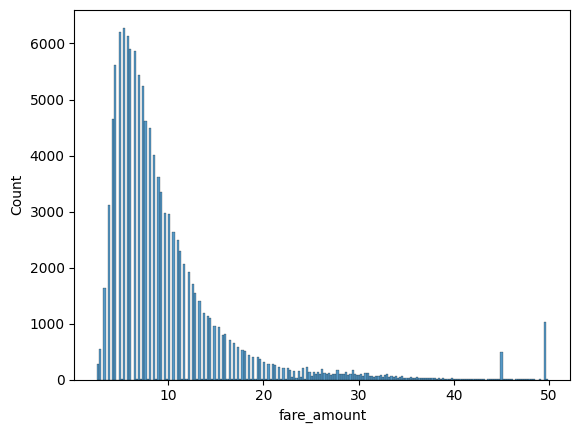

In [15]:
sns.histplot(df.fare_amount)

In [16]:
df.fare_amount.quantile()

7.7

In [23]:
#finding distance travelled using Lat and Long information
def haversine_distance(df,lat1,long1,lat2,long2):
    #Calculating haversine distance between 2 GPS coordinates
    r=6371 #Radius of earth in km
    ph1=np.radians(df[lat1])
    ph2=np.radians(df[lat2])

    dphi=np.radians(df[lat2]-df[lat1])
    dlambda=np.radians(df[long2]-df[long1])

    a=np.sin(dphi/2)**2 + np.cos(ph1)*np.cos(ph2)*np.sin(dlambda/2)**2
    dist=2*r*np.arcsin(np.sqrt(a))
    return dist

In [25]:
#Feature Engineering
df['dist(km)']=haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist(km)
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


<AxesSubplot:>

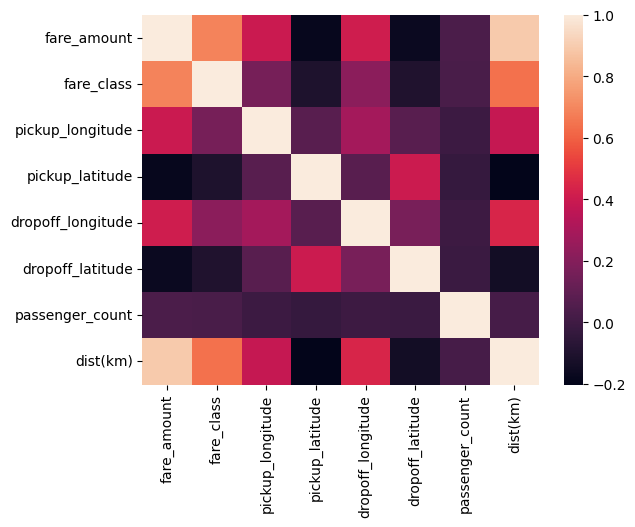

In [30]:
sns.heatmap(df.drop('pickup_datetime',axis=1).corr())

In [36]:
df.groupby(by='fare_class')['fare_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
fare_class,,,,,,,,
0,80000.0,6.380803,1.756314,2.5,4.9,6.1,7.7,9.91
1,40000.0,17.359373,9.068341,10.0,11.3,13.7,19.3,49.90


In [37]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

In [38]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist(km)
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [40]:
mytime=df.pickup_datetime[0]

In [46]:
mytime.date()

datetime.date(2010, 4, 19)

In [47]:
#timestamps occur in April and in UTC, there is a 4 hour day light saving
df['EDTdate'] = df.pickup_datetime - pd.Timedelta(hours=4)
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist(km),EDTdate
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00


In [50]:
df['Hour']=df.EDTdate.dt.hour

In [51]:
df['AM/PM']=df.Hour.apply(lambda x: 'AM' if x<12 else 'PM')

In [54]:
df['Weekday']=df.EDTdate.dt.strftime("%a")


In [56]:
# Categorical Columns
cat_cols=['Hour','AM/PM','Weekday']

In [85]:
#Continous Columns
cont_cols=list(df.drop(['Hour','EDTdate','AM/PM','Weekday','pickup_datetime'],axis=1).columns)
cont_cols

['fare_amount',
 'fare_class',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'dist(km)']

In [62]:
target_col=['fare_amount']

In [64]:
df[cat_cols]=df[cat_cols].astype('category')

In [68]:
df.Hour.head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [69]:
df.Weekday.head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [74]:
df['AM/PM'].head()

0    AM
1    AM
2    AM
3    PM
4    PM
Name: AM/PM, dtype: category
Categories (2, object): [AM, PM]

In [80]:
hr=df.Hour.cat.codes.values
ampm=df['AM/PM'].cat.codes.values
wkdy=df.Weekday.cat.codes.values
wkdy

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [81]:
categs=np.stack([hr,ampm,wkdy],axis=1)
categs

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [82]:
categ_tensor=torch.tensor(categs,dtype=torch.int64)

In [95]:
continuous=np.stack([df[con_col].values for con_col in cont_cols],axis=1)
continuous

array([[  6.5       ,   0.        , -73.992365  , ...,  40.744746  ,
          1.        ,   2.12631159],
       [  6.9       ,   0.        , -73.990078  , ...,  40.744114  ,
          1.        ,   1.39230687],
       [ 10.1       ,   1.        , -73.994149  , ...,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [ 12.5       ,   1.        , -73.988574  , ...,  40.707799  ,
          3.        ,   5.05252282],
       [  4.9       ,   0.        , -74.004449  , ...,  40.730765  ,
          1.        ,   1.20892296],
       [  5.3       ,   0.        , -73.955415  , ...,  40.763015  ,
          3.        ,   1.42739869]])

In [98]:
cont_tensor=torch.tensor(continuous,dtype=torch.float)
cont_tensor

tensor([[  6.5000,   0.0000, -73.9924,  ...,  40.7447,   1.0000,   2.1263],
        [  6.9000,   0.0000, -73.9901,  ...,  40.7441,   1.0000,   1.3923],
        [ 10.1000,   1.0000, -73.9941,  ...,  40.7662,   2.0000,   3.3268],
        ...,
        [ 12.5000,   1.0000, -73.9886,  ...,  40.7078,   3.0000,   5.0525],
        [  4.9000,   0.0000, -74.0044,  ...,  40.7308,   1.0000,   1.2089],
        [  5.3000,   0.0000, -73.9554,  ...,  40.7630,   3.0000,   1.4274]])

In [101]:
y=torch.tensor(df[target_col].values,dtype=torch.float)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [102]:
cont_tensor.shape

torch.Size([120000, 8])

In [103]:
categ_tensor.shape

torch.Size([120000, 3])

In [105]:
categ_sizes=[len(df[cat_col].cat.categories) for cat_col in cat_cols]
categ_sizes

[24, 2, 7]

In [108]:
#Max out at 50 
embedding_size=[(size,min(50,(size+1)//2)) for size in categ_sizes]
embedding_size

[(24, 12), (2, 1), (7, 4)]

In [110]:
selfembedding=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedding_size])

In [111]:
selfembedding #One layer for each category is created

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [112]:
embedding=[]
for i,e in enumerate(selfembedding):
    embedding.append(e(categ_tensor[:2][:,i]))

In [131]:
embedding

[tensor([[ 0.5259, -0.4390,  0.6436, -0.0077,  1.2492, -1.2215, -1.1295, -0.1890,
          -0.0402, -1.8139, -1.4042, -0.4707],
         [ 0.0206, -0.2606,  1.3962, -0.0841, -1.6280,  0.7552,  0.3485, -0.2121,
           1.2390, -0.6153, -0.2627,  0.5473]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.9354],
         [-0.9354]], grad_fn=<EmbeddingBackward>),
 tensor([[ 2.3911,  0.3607, -1.5898, -0.1184],
         [ 0.2315,  1.0591, -0.2991, -0.7592]], grad_fn=<EmbeddingBackward>)]

In [132]:
z=torch.cat(embedding,dim=1)

In [120]:
z

tensor([[ 0.5259, -0.4390,  0.6436, -0.0077,  1.2492, -1.2215, -1.1295, -0.1890,
         -0.0402, -1.8139, -1.4042, -0.4707, -0.9354,  2.3911,  0.3607, -1.5898,
         -0.1184],
        [ 0.0206, -0.2606,  1.3962, -0.0841, -1.6280,  0.7552,  0.3485, -0.2121,
          1.2390, -0.6153, -0.2627,  0.5473, -0.9354,  0.2315,  1.0591, -0.2991,
         -0.7592]], grad_fn=<CatBackward>)

In [125]:
selfembedding_drop=nn.Dropout(p=0.4)
z=selfembedding_drop(z)
z

tensor([[ 0.0000, -0.0000,  1.0726, -0.0000,  0.0000, -2.0359, -1.8824, -0.3150,
         -0.0669, -3.0231, -2.3404, -0.7845, -0.0000,  3.9851,  0.6011, -0.0000,
         -0.1973],
        [ 0.0343, -0.4343,  2.3270, -0.1402, -0.0000,  1.2587,  0.0000, -0.3535,
          2.0650, -1.0255, -0.0000,  0.9121, -0.0000,  0.3858,  1.7652, -0.4986,
         -1.2653]], grad_fn=<MulBackward0>)

In [133]:
class TabularModel(nn.Module):
    def __init__(self,embedding_size,n_cont,out_sz,layers,p=0.5) -> None:
        # Example layers=[100,150,20]
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedding_size])
        self.emb_drop=nn.Dropout(p=0.5)
        self.bn_cont=nn.BatchNorm1d(n_cont)

        layerlist=[]
        n_embs= [nf for ni,nf in embedding_size]
        n_in = n_embs + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers=nn.Sequential(*layerlist)

    def forward(self,x_cat,x_cont):
        embedding=[]
        for i,e in enumerate(self.embeds):
            embedding.append(e[x_cat[:,i]])
        
        x=torch.cat(embedding,1)
        x=self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)

        return x

In [ ]:
def TabularModel(nn.Module):
    def __init__(self,embedding_size,n_cont,out_sz,layers):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedding_size])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)   

        layerlist=[]
        n_embds=[nf for ni,nf in embedding_size]
        n_in=n_cont+n_embds

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p=0.5))
        
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers=nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embedding=[]

        for i,e in enumerate(self.embeds):
            embedding.append(e[x_cat[:,i]])
        
        x=torch.cat(embedding,1)
        
            
